### Final end-to-end procedure

We will now run the full conformal procedure, randomly shuffling the data into a calibration and test set, before using the best lambda found on calibration to evaluate using hierarchical loss on test. Lets see how far the test loss diverges from the best lambda's loss (which we know is within our threshold of sampling proteins with at least the same superfamily).

In [1]:
from scope_utils import get_sims_labels, get_thresh_hierarchical, get_hierarchical_loss
import numpy as np
near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)
sims = np.asarray(sims)

# Normalize data using min-max scaling (we assume we don't have )
min_sim, max_sim = min(sims), max(sims)
min_row, max_row = [], []
for query in near_ids:
    query['Norm_S_i'] = (query['S_i'] - min_sim) / (max_sim - min_sim) # normalize each row of S_i
    min_row.append(min(query['Norm_S_i'])) 
    max_row.append(max(query['Norm_S_i']))

    # Now we cumsum the normalized S_i
    query['Sum_Norm_S_i'] = np.cumsum(query['Norm_S_i'])
sims_norm = (sims - min(sims)) / (max(sims) - min(sims))

# Define lambda linspace, NOTE: for now we want to play around with it so we keep it here, can move it to the get_thresh_hierarchical function later.
x = np.linspace(min(min_row)*near_ids[0]['S_i'].shape[0], max(max_row)*near_ids[0]['S_i'].shape[0], near_ids[0]['S_i'].shape[0])

num_trials = 10
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 8.000541418516514
Loss of best lambda: 0.977361111111111
Trial 1: Lambda: 8.00, Test loss: 1.06
worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 7.00047374120195
Loss of best lambda: 0.9645238095238097
Trial 2: Lambda: 7.00, Test loss: 0.89
worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 7.00047374120195
Loss of best lambda: 0.9519642857142857
Trial 3: Lambda: 7.00, Test loss: 0.93
worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 8.000541418516514
Loss of best lambda: 0.9817592592592592
Trial 4: Lambda: 8.00, Test loss: 1.05
worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 7.00047374120195
Loss of best lambda: 0.9594642857142858
Trial 5: Lambda: 7.00, Test loss: 0.91
worst case loss: 3.976855924747919
Loss threshold: 0.9900771469175069
Best lambda: 8.000541418516514
Los

In [2]:
num_trials = 10
alpha = 2 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family and superfamily level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 47.00318083378452
Loss of best lambda: 1.9814648971056037
Trial 1: Lambda: 47.00, Test loss: 1.82
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 51.00345154304278
Loss of best lambda: 1.9878748317831476
Trial 2: Lambda: 51.00, Test loss: 2.03
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 50.00338386572821
Loss of best lambda: 1.9924370855241886
Trial 3: Lambda: 50.00, Test loss: 1.96
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 52.00351922035734
Loss of best lambda: 1.9889176574542284
Trial 4: Lambda: 52.00, Test loss: 2.08
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 48.00324851109909
Loss of best lambda: 1.9892043515001705
Trial 5: Lambda: 48.00, Test loss: 1.85
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 46.003113156

In [3]:
num_trials = 10
alpha = 3 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family, superfamily and fold level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 281.01901732539255
Loss of best lambda: 2.996733552292797
Trial 1: Lambda: 281.02, Test loss: 2.99
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 284.0192203573362
Loss of best lambda: 2.995273347815085
Trial 2: Lambda: 284.02, Test loss: 3.01
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 280.018949648078
Loss of best lambda: 2.9961104582926414
Trial 3: Lambda: 280.02, Test loss: 2.98
worst case loss: 3.9766529065439533
Loss threshold: 2.9967444903115203
Best lambda: 262.01773145641585
Loss of best lambda: 2.995654782091469
Trial 4: Lambda: 262.02, Test loss: 2.86
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 279.0188819707634
Loss of best lambda: 2.996095503154845
Trial 5: Lambda: 279.02, Test loss: 2.97
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 287.01942

In [7]:
x = np.linspace(0, 100, 100) # max family size is ~100, assuming all retrieved proteins are max prob of 1

loss = []
for l in x:
    loss.append(get_hierarchical_loss(near_ids, l))



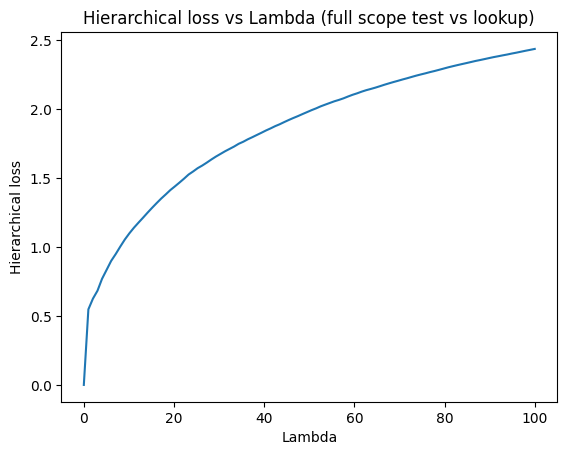

In [10]:
# plot loss vs lambda
import matplotlib.pyplot as plt
plt.plot(x, loss)
plt.xlabel('Lambda')
plt.ylabel('Hierarchical loss')
plt.title('Hierarchical loss vs Lambda (full scope test vs lookup)')
plt.show()


### Try max hierarchical loss
Taking the max over the set of retrieved proteins within our similarity threshold may be better, as it increases monotonically.

In [1]:
from scope_utils import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims), max(sims), 1000)

min(x), max(x)

(0.9992992877960205, 0.9999949336051941)

In [2]:
loss = []
for l in reversed(x):
    loss.append(get_hierarchical_max_loss(near_ids, l))



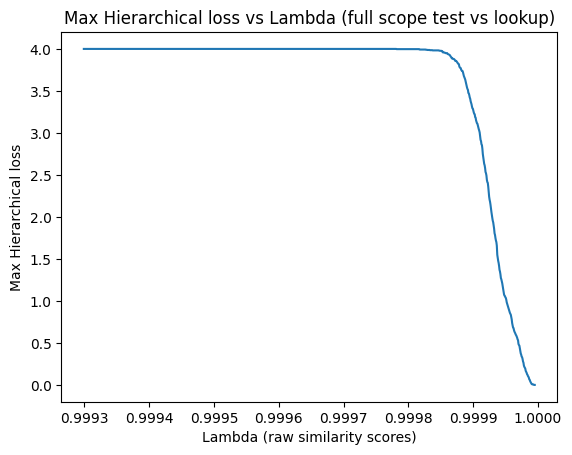

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, loss[::-1])
plt.xlabel('Lambda (raw similarity scores)')
plt.ylabel('Max Hierarchical loss')
plt.title('Max Hierarchical loss vs Lambda (full scope test vs lookup)')
plt.show()


In [2]:
num_trials = 10
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_max_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999524567339633
Loss of best lambda: 0.9833333333333333
Trial 1: Lambda: 1.00, Test loss: 0.91
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.97
Trial 2: Lambda: 1.00, Test loss: 1.02
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.96
Trial 3: Lambda: 1.00, Test loss: 1.05
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.98
Trial 4: Lambda: 1.00, Test loss: 0.99
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.9733333333333334
Trial 5: Lambda: 1.00, Test loss: 1.01
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999510640496606
Loss of best lambda: 0.9833333333333333
Trial 6: Lambda: 1.00, Test loss: 1.10
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999510640496606
Loss of best lambda: 0.97
Trial 7: Lambda: 1.00, Test loss: 1.14
wor